In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Geometric_stiffness import Frame, Nodes, Elements


### This is problem 1 from in-class code review

 # Define Nodes
nodes = []
nodes.append(Nodes(0.0, 0.0, 0.0))
nodes.append(Nodes((1/6)*25.0, (1/6)*50.0, (1/6)*37.0))
nodes.append(Nodes((2/6)*25.0, (2/6)*50.0, (2/6)*37.0))
nodes.append(Nodes((3/6)*25.0, (3/6)*50.0, (3/6)*37.0))
nodes.append(Nodes((4/6)*25.0, (4/6)*50.0, (4/6)*37.0))
nodes.append(Nodes((5/6)*25.0, (5/6)*50.0, (5/6)*37.0))
nodes.append(Nodes(25.0, 50.0, 37.0))

# Apply boundary conditions
nodes[0].set_boundary_constraints([True, True, True, True, True, True])  # Node 0 constrained in all directions
nodes[1].set_boundary_constraints([False, False, False, False, False, False])   # Node 1 unconstrained
nodes[2].set_boundary_constraints([False, False, False, False, False, False])   # Node 2 unconstrained
nodes[3].set_boundary_constraints([False, False, False, False, False, False])   # Node 3 unconstrained
nodes[4].set_boundary_constraints([False, False, False, False, False, False])   # Node 4 unconstrained
nodes[5].set_boundary_constraints([False, False, False, False, False, False])   # Node 5 unconstrained
nodes[6].set_boundary_constraints([False, False, False, False, False, False])   # Node 6 unconstrained


nodes[6].set_nodal_load(0.05, -0.1, 0.23, 0.1, -0.025, -0.08)

E = 10000  # Young's Modulus in Pascals
r = 1  # Width of the beam in meters
v = 0.3  # Poisson's Ratio

# Cross-sectional properties
A = np.pi * r ** 2.0  # Cross-sectional Area in square meters
I_y = np.pi * r ** 4.0 / 4.0  # Moment of Inertia about y-axis
I_z = np.pi * r ** 4.0 / 4.0  # Moment of Inertia about z-axis
I_p = np.pi * r ** 4.0 / 2.0  # Polar Moment of Inertia 
J = np.pi * r ** 4.0 / 2.0  # Torsional Constant

# Local z-axis directions
# local_z_axis = [0, 0, 1]

# Assuming Elements class exists and nodes list is defined
elements = []
elements.append(Elements(nodes[0], nodes[1], E, v, A, I_y, I_z, I_p, J))
elements.append(Elements(nodes[1], nodes[2], E, v, A, I_y, I_z, I_p, J))
elements.append(Elements(nodes[2], nodes[3], E, v, A, I_y, I_z, I_p, J))
elements.append(Elements(nodes[3], nodes[4], E, v, A, I_y, I_z, I_p, J))
elements.append(Elements(nodes[4], nodes[5], E, v, A, I_y, I_z, I_p, J))
elements.append(Elements(nodes[5], nodes[6], E, v, A, I_y, I_z, I_p, J))



# Create Frame and Compute Results
frame = Frame(nodes, elements)
U, R = frame.calculations()


# Check Nodal Location
print("\nInitial Nodal Location:")
for i, node in enumerate(nodes):
    loc = node.get_coordinates()
    print(f"Node {i}: x={loc[0]:.6f}, y={loc[1]:.6f}, z={loc[2]:.6f}")

# Output Results
print("\nNodal Displacements & Rotations:")
for i, node in enumerate(nodes):
    print(f"Node {i}: u={U[i * 6]:.6f}, v={U[i * 6 + 1]:.6f}, w={U[i * 6 + 2]:.6f}, "
            f"θx={U[i * 6 + 3]:.6f}, θy={U[i * 6 + 4]:.6f}, θz={U[i * 6 + 5]:.6f}")

print("\nReaction Forces & Moments at Supports:")
for i, node in enumerate(nodes):
    print(f"Node {i}: Fx={R[i * 6]:.6f}, Fy={R[i * 6 + 1]:.6f}, Fz={R[i * 6 + 2]:.6f}, "
            f"Mx={R[i * 6 + 3]:.6f}, My={R[i * 6 + 4]:.6f}, Mz={R[i * 6 + 5]:.6f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Geometric_stiffness import Frame, Nodes, Elements


### This is problem 2 from in-class code review


 # Define Nodes
nodes = []
nodes.append(Nodes(0.0, 0.0, 0.0))
nodes.append(Nodes((1/6)*25.0, (1/6)*50.0, (1/6)*37.0))
nodes.append(Nodes((2/6)*25.0, (2/6)*50.0, (2/6)*37.0))
nodes.append(Nodes((3/6)*25.0, (3/6)*50.0, (3/6)*37.0))
nodes.append(Nodes((4/6)*25.0, (4/6)*50.0, (4/6)*37.0))
nodes.append(Nodes((5/6)*25.0, (5/6)*50.0, (5/6)*37.0))
nodes.append(Nodes(25.0, 50.0, 37.0))

# Apply boundary conditions
nodes[0].set_boundary_constraints([True, True, True, True, True, True])  # Node 0 constrained in all directions
nodes[1].set_boundary_constraints([False, False, False, False, False, False])   # Node 1 unconstrained
nodes[2].set_boundary_constraints([False, False, False, False, False, False])   # Node 2 unconstrained
nodes[3].set_boundary_constraints([False, False, False, False, False, False])   # Node 3 unconstrained
nodes[4].set_boundary_constraints([False, False, False, False, False, False])   # Node 4 unconstrained
nodes[5].set_boundary_constraints([False, False, False, False, False, False])   # Node 5 unconstrained
nodes[6].set_boundary_constraints([False, False, False, False, False, False])   # Node 6 unconstrained


nodes[6].set_nodal_load(0.05, -0.1, 0.23, 0.1, -0.025, -0.08)

E = 10000  # Young's Modulus in Pascals
r = 1  # Width of the beam in meters
v = 0.3  # Poisson's Ratio

# Cross-sectional properties
A = np.pi * r ** 2.0  # Cross-sectional Area in square meters
I_y = np.pi * r ** 4.0 / 4.0  # Moment of Inertia about y-axis
I_z = np.pi * r ** 4.0 / 4.0  # Moment of Inertia about z-axis
I_p = np.pi * r ** 4.0 / 2.0  # Polar Moment of Inertia 
J = np.pi * r ** 4.0 / 2.0  # Torsional Constant

# Local z-axis directions
# local_z_axis = [0, 0, 1]

# Assuming Elements class exists and nodes list is defined
elements = []
elements.append(Elements(nodes[0], nodes[1], E, v, A, I_y, I_z, I_p, J))
elements.append(Elements(nodes[1], nodes[2], E, v, A, I_y, I_z, I_p, J))
elements.append(Elements(nodes[2], nodes[3], E, v, A, I_y, I_z, I_p, J))
elements.append(Elements(nodes[3], nodes[4], E, v, A, I_y, I_z, I_p, J))
elements.append(Elements(nodes[4], nodes[5], E, v, A, I_y, I_z, I_p, J))
elements.append(Elements(nodes[5], nodes[6], E, v, A, I_y, I_z, I_p, J))



# Create Frame and Compute Results
frame = Frame(nodes, elements)
U, R = frame.calculations()


# Check Nodal Location
print("\nInitial Nodal Location:")
for i, node in enumerate(nodes):
    loc = node.get_coordinates()
    print(f"Node {i}: x={loc[0]:.6f}, y={loc[1]:.6f}, z={loc[2]:.6f}")

# Output Results
print("\nNodal Displacements & Rotations:")
for i, node in enumerate(nodes):
    print(f"Node {i}: u={U[i * 6]:.6f}, v={U[i * 6 + 1]:.6f}, w={U[i * 6 + 2]:.6f}, "
            f"θx={U[i * 6 + 3]:.6f}, θy={U[i * 6 + 4]:.6f}, θz={U[i * 6 + 5]:.6f}")

print("\nReaction Forces & Moments at Supports:")
for i, node in enumerate(nodes):
    print(f"Node {i}: Fx={R[i * 6]:.6f}, Fy={R[i * 6 + 1]:.6f}, Fz={R[i * 6 + 2]:.6f}, "
            f"Mx={R[i * 6 + 3]:.6f}, My={R[i * 6 + 4]:.6f}, Mz={R[i * 6 + 5]:.6f}")

# Critical Load Factor
critical_load_factor, eigenvector = frame.elastic_critical_load()
print(f"\nCritical Load Factor: {critical_load_factor}")

# Plot the buckling shape
frame.plot_buckling_mode(eigenvector)



Initial Nodal Location:
Node 0: x=0.000000, y=0.000000, z=0.000000
Node 1: x=11.000000, y=0.000000, z=0.000000
Node 2: x=11.000000, y=23.000000, z=0.000000
Node 3: x=0.000000, y=23.000000, z=0.000000
Node 4: x=0.000000, y=0.000000, z=15.000000
Node 5: x=11.000000, y=0.000000, z=15.000000
Node 6: x=11.000000, y=23.000000, z=15.000000
Node 7: x=0.000000, y=23.000000, z=15.000000
Node 8: x=0.000000, y=0.000000, z=28.000000
Node 9: x=11.000000, y=0.000000, z=28.000000
Node 10: x=11.000000, y=23.000000, z=28.000000
Node 11: x=0.000000, y=23.000000, z=28.000000

Nodal Displacements & Rotations:
Node 0: u=0.000000, v=0.000000, w=0.000000, θx=0.000000, θy=0.000000, θz=0.000000
Node 1: u=0.000000, v=0.000000, w=0.000000, θx=0.000000, θy=0.000000, θz=0.000000
Node 2: u=0.000000, v=0.000000, w=0.000000, θx=0.000000, θy=0.000000, θz=0.000000
Node 3: u=0.000000, v=0.000000, w=0.000000, θx=0.000000, θy=0.000000, θz=0.000000
Node 4: u=0.000000, v=-0.000000, w=-0.000477, θx=0.000000, θy=0.000000, θz=

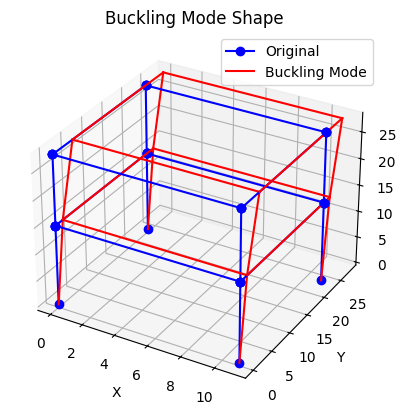

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Geometric_stiffness import Frame, Nodes, Elements


### This is problem 3 from in-class code review

L1 = 11.0
L2 = 23.0
L3 = 15.0
L4 = 13.0

 # Define Nodes
nodes = []
nodes.append(Nodes(0.0, 0.0, 0.0))                              # 0
nodes.append(Nodes(0.0 + L1, 0.0, 0.0))                         # 1
nodes.append(Nodes(0.0 + L1, 0.0 + L2, 0.0))                    # 2
nodes.append(Nodes(0.0, 0.0 + L2, 0.0))                         # 3
nodes.append(Nodes(0.0, 0.0, 0.0 + L3))                         # 4
nodes.append(Nodes(0.0 + L1, 0.0, 0.0 + L3))                    # 5
nodes.append(Nodes(0.0 + L1, 0.0 + L2, 0.0 + L3))               # 6
nodes.append(Nodes(0.0, 0.0 + L2, 0.0 + L3))                    # 7
nodes.append(Nodes(0.0, 0.0, 0.0 + L3 + L4))                    # 8
nodes.append(Nodes(0.0 + L1, 0.0, 0.0 + L3 + L4))               # 9
nodes.append(Nodes(0.0 + L1, 0.0 + L2, 0.0 + L3 + L4))          # 10
nodes.append(Nodes(0.0, 0.0 + L2, 0.0 + L3 + L4))               # 11


# Apply boundary conditions
nodes[0].set_boundary_constraints([True, True, True, True, True, True])  # Node 0 constrained in all directions
nodes[1].set_boundary_constraints([True, True, True, True, True, True])   # Node 1 constrained
nodes[2].set_boundary_constraints([True, True, True, True, True, True])   # Node 2 constrained
nodes[3].set_boundary_constraints([True, True, True, True, True, True])   # Node 3 constrained
nodes[4].set_boundary_constraints([False, False, False, False, False, False])   # Node 4 unconstrained
nodes[5].set_boundary_constraints([False, False, False, False, False, False])   # Node 5 unconstrained
nodes[6].set_boundary_constraints([False, False, False, False, False, False])   # Node 6 unconstrained
nodes[7].set_boundary_constraints([False, False, False, False, False, False])   # Node 7 unconstrained
nodes[8].set_boundary_constraints([False, False, False, False, False, False])   # Node 8 unconstrained
nodes[9].set_boundary_constraints([False, False, False, False, False, False])   # Node 9 unconstrained
nodes[10].set_boundary_constraints([False, False, False, False, False, False])   # Node 10 unconstrained
nodes[11].set_boundary_constraints([False, False, False, False, False, False])   # Node 11 unconstrained


nodes[8].set_nodal_load(0, 0, -1, 0, 0, 0)
nodes[9].set_nodal_load(0, 0, -1, 0, 0, 0)
nodes[10].set_nodal_load(0, 0, -1, 0, 0, 0)
nodes[11].set_nodal_load(0, 0, -1, 0, 0, 0)


# First set (a) of elements
E = 10000  # Young's Modulus in Pascals
r = 1  # Width of the beam in meters
v = 0.3  # Poisson's Ratio
A = np.pi * r ** 2.0  # Cross-sectional Area in square meters
I_y = np.pi * r ** 4.0 / 4.0  # Moment of Inertia about y-axis
I_z = np.pi * r ** 4.0 / 4.0  # Moment of Inertia about z-axis
I_p = np.pi * r ** 4.0 / 2.0  # Polar Moment of Inertia 
J = np.pi * r ** 4.0 / 2.0  # Torsional Constant


# Second set (b) of elements
E_b = 50000  # Young's Modulus in Pascals
b = 0.5
h = 1
v_b = 0.3  # Poisson's Ratio
A_b = b * h  # Cross-sectional Area in square meters
I_y_b = h * b ** 3.0 / 12.0  # Moment of Inertia about y-axis
I_z_b = b * h ** 3.0 / 12.0  # Moment of Inertia about z-axis
I_p_b = b * h / 12.0 * (b ** 2.0 + h ** 2.0)  # Polar Moment of Inertia 
J_b = 0.02861002604166667  # Torsional Constant

# Local z-axis directions
local_z_axis = [0, 0, 1]

# Assuming Elements class exists and nodes list is defined
elements = []
elements.append(Elements(nodes[0], nodes[4], E, v, A, I_y, I_z, I_p, J))    # 0
elements.append(Elements(nodes[1], nodes[5], E, v, A, I_y, I_z, I_p, J))    # 1
elements.append(Elements(nodes[2], nodes[6], E, v, A, I_y, I_z, I_p, J))    # 2
elements.append(Elements(nodes[3], nodes[7], E, v, A, I_y, I_z, I_p, J))    # 3
elements.append(Elements(nodes[4], nodes[8], E, v, A, I_y, I_z, I_p, J))    # 4
elements.append(Elements(nodes[5], nodes[9], E, v, A, I_y, I_z, I_p, J))    # 5
elements.append(Elements(nodes[6], nodes[10], E, v, A, I_y, I_z, I_p, J))    # 6
elements.append(Elements(nodes[7], nodes[11], E, v, A, I_y, I_z, I_p, J))    # 7
elements.append(Elements(nodes[4], nodes[5], E_b, v_b, A_b, I_y_b, I_z_b, I_p_b, J_b))    # 8
elements.append(Elements(nodes[5], nodes[6], E_b, v_b, A_b, I_y_b, I_z_b, I_p_b, J_b))    # 9
elements.append(Elements(nodes[6], nodes[7], E_b, v_b, A_b, I_y_b, I_z_b, I_p_b, J_b))    # 10
elements.append(Elements(nodes[7], nodes[4], E_b, v_b, A_b, I_y_b, I_z_b, I_p_b, J_b))    # 11
elements.append(Elements(nodes[8], nodes[9], E_b, v_b, A_b, I_y_b, I_z_b, I_p_b, J_b))    # 12
elements.append(Elements(nodes[9], nodes[10], E_b, v_b, A_b, I_y_b, I_z_b, I_p_b, J_b))    # 13
elements.append(Elements(nodes[10], nodes[11], E_b, v_b, A_b, I_y_b, I_z_b, I_p_b, J_b))    # 14
elements.append(Elements(nodes[11], nodes[8], E_b, v_b, A_b, I_y_b, I_z_b, I_p_b, J_b))    # 15



# Create Frame and Compute Results
frame = Frame(nodes, elements)
U, R = frame.calculations()


# Check Nodal Location
print("\nInitial Nodal Location:")
for i, node in enumerate(nodes):
    loc = node.get_coordinates()
    print(f"Node {i}: x={loc[0]:.6f}, y={loc[1]:.6f}, z={loc[2]:.6f}")

# Output Results
print("\nNodal Displacements & Rotations:")
for i, node in enumerate(nodes):
    print(f"Node {i}: u={U[i * 6]:.6f}, v={U[i * 6 + 1]:.6f}, w={U[i * 6 + 2]:.6f}, "
            f"θx={U[i * 6 + 3]:.6f}, θy={U[i * 6 + 4]:.6f}, θz={U[i * 6 + 5]:.6f}")

print("\nReaction Forces & Moments at Supports:")
for i, node in enumerate(nodes):
    print(f"Node {i}: Fx={R[i * 6]:.6f}, Fy={R[i * 6 + 1]:.6f}, Fz={R[i * 6 + 2]:.6f}, "
            f"Mx={R[i * 6 + 3]:.6f}, My={R[i * 6 + 4]:.6f}, Mz={R[i * 6 + 5]:.6f}")

# Critical Load Factor
critical_load_factor, eigenvector = frame.elastic_critical_load()
print(f"\nCritical Load Factor: {critical_load_factor}")

# Plot the buckling shape
frame.plot_buckling_mode(eigenvector)
